<a href="https://colab.research.google.com/github/jjiahao/or/blob/master/tsp_Hemmingway_location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.nytimes.com/2015/10/04/travel/places-where-hemingway-lived-or-traveled.html

https://www.sandiegouniontribune.com/sdut-hemingway-5-places-where-he-lived-drank-wrote-2014jun17-story.html

# Oak Park, Illinois, USA
OAK PARK, ILL. Ernest Hemingway was born on the second floor of a Queen Anne-style house at 339 North Oak Park Avenue in July 1899. Practically from the start, he longed to escape the “wide lawns and narrow minds” of the western Chicago suburbs, and often accompanied his father on long hunting trips. At age 16 his first piece of short fiction was published in his high school literary magazine.

# Horton Bay, Michigan, USA
# Paris, France
PARIS After their wedding in Horton Bay, Mich., Hemingway and his first wife, Hadley Richardson, moved to Paris, where he began writing feverishly and palling around with other Lost Generation writers. In “A Good Café on the Place St-Michel,” Hemingway describes a process of “transplanting” himself back to Michigan while scribbling away on the Left Bank: “I had already seen the end of fall come through boyhood, youth and young manhood, and in one place you could write about it better than in another.”

# Pamplona, Spain
PAMPLONA, Spain Hemingway visited Pamplona every year between 1923 and 1927, timing his stay with San Fermín, the city’s famously bloody bullfighting festival. The city also provided ample opportunity for the macho antics that Hemingway dearly loved, including entering the amateur bullfighting ring several times to tangle with bulls.

# Madrid, Spain
MADRID As a war correspondent, Hemingway spent parts of 1937 and 1938 in and around Madrid, covering the Spanish Civil War, experiences he later used in “For Whom the Bell Tolls.” He returned to Madrid in the ’50s to watch bullfights and eat and drink prodigiously at the city’s restaurants and beer halls, like El Callejón and Cervecería Alemana. Madrid occupied a rare place of privilege in the Hemingway cosmos. In “Death in the Afternoon,” he wrote that it “is the most Spanish of all cities, the best to live in.”

# Havana, Cuba
HAVANA In 1939, Hemingway moved to Cuba with his third wife, the war correspondent Martha Gellhorn, and wound up staying 22 years (he lived in Cuba longer than anyplace else in his life). A farmhouse called Finca Vigía, in the hills overlooking Havana, was his home (and now a museum); it was there that he wrote much of “For Whom the Bell Tolls” and “The Old Man and the Sea,” and where he got the news that he had won the Nobel Prize for literature in 1954. “This is one prize that belongs to Cuba,” he said, “because my work was conceived and created in Cuba.”

# Key West, Florida, USA
KEY WEST, Fla. Perhaps the best marketed of Hemingway’s haunts, Key West has come close to styling itself as “Papaland,” with its annual “Papa Look-Alike Contest” and the former home-turned-museum, at right, that is mostly notable for its dozens of six-toed cats (all descendants of Hemingway’s beloved pet, Snow White). Although Hemingway owned the house from 1931 to 1939, he spent very little time there, using it more as a launching pad for marlin-fishing excursions. His 1937 novel “To Have and Have Not,” about a smuggler named Harry Morgan, is partly set in Key West.

# Ketchum, Idaho
KETCHUM, IDAHO Hemingway liked to visit Ketchum in the fall, when the cottonwood leaves were yellowing and the air was turning crisp. It had a bracing effect on his writing. During his first stay, in September 1939, he put the finishing touches on “For Whom the Bell Tolls.” In 1947, he came back to tinker with “Islands in the Stream.” And in his last two years in Ketchum he worked sporadically on a memoir, “A Moveable Feast,” though he never finished it; Hemingway committed suicide on July 2, 1961, at his home near Sun Valley.

339 N Oak Park AveOak Park, IL 60302

# Piggott, Arkansas, USA
Hemingway and his second wife, Pauline Pfeiffer, often visited her family home in Piggott, Arkansas. Today the site is the Hemingway-Pfeiffer Museum, restored to how it would have looked in the late 1920s and ‘30s.

In [1]:
from geopy.geocoders import Nominatim

In [2]:
location_list = ["Oak Park, Illinois, USA", "Horton Bay, Michigan, USA", 
                 "Paris, France", "Pamplona, Spain", "Madrid, Spain", 
                 "Havana, Cuba", "Key West, Florida, USA", "Ketchum, Idaho","Piggott, Arkansas, USA"]

In [3]:
import pandas as pd
locator = Nominatim(user_agent="myGeocoder")
df = pd.DataFrame(location_list, columns = ['location'])
df["latitude"] = df.location.apply(lambda x: locator.geocode(x).latitude)
df["longitude"] = df.location.apply(lambda x: locator.geocode(x).longitude)
df

,location,latitude,longitude
0,"Oak Park, Illinois, USA",41.887814,-87.788762
1,"Horton Bay, Michigan, USA",45.284453,-85.078946
2,"Paris, France",48.856697,2.351462
3,"Pamplona, Spain",42.818454,-1.644256
4,"Madrid, Spain",40.416705,-3.703582
5,"Havana, Cuba",23.135305,-82.358963
6,"Key West, Florida, USA",24.562557,-81.772437
7,"Ketchum, Idaho",43.680741,-114.363662
8,"Piggott, Arkansas, USA",36.391744,-90.201281


In [4]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 15.2MB/s 
     |████████████████████████████████| 14.8MB 316kB/s 


In [5]:
import geopandas
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

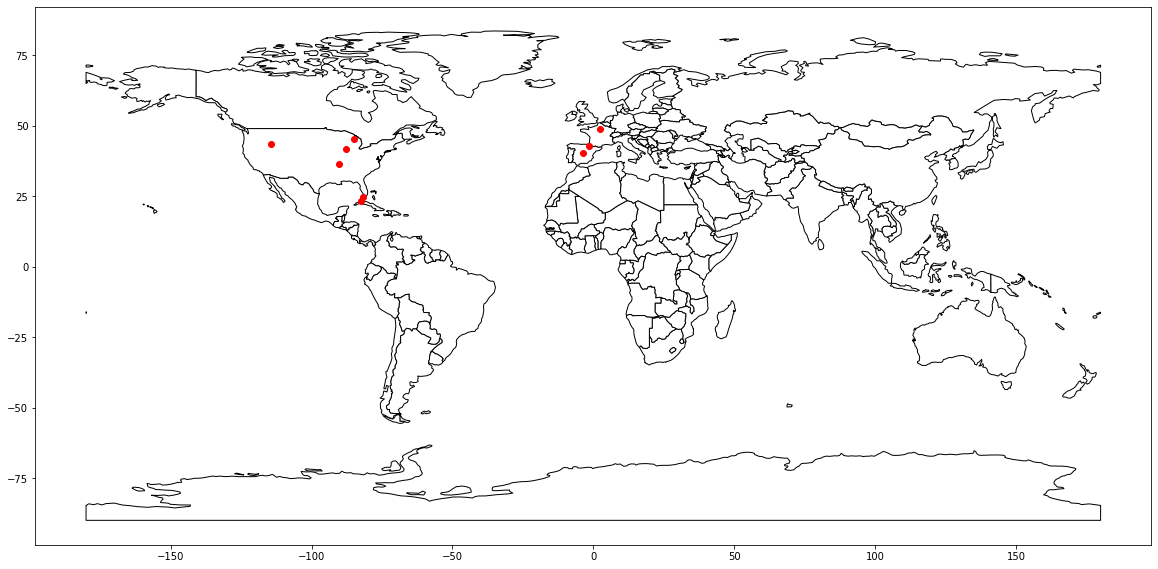

In [6]:
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(20, 15))
gdf.plot(ax=ax, color='red')
plt.show()

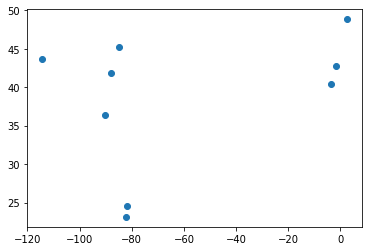

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df["longitude"], df["latitude"])

In [9]:
import numpy as np
cities = np.array(["Oak Park", "Horton Bay", 
                 "Paris", "Pamplona", "Madrid", 
                 "Havana", "Key West", "Ketchum","Piggott"])

In [10]:
print(np.where(cities == "Havana"))

(array([5]),)


In [11]:
distances = np.array([
          ("Oak Park","Horton Bay",271.01),
          ("Oak Park","Paris",4138.26),
          ("Oak Park","Pamplona",4188.80),
          ("Oak Park","Madrid",4185.31),
          ("Oak Park","Havana",1332.98),
          ("Oak Park","Key West",1245.68),
          ("Oak Park","Ketchum",1347.46),
          ("Oak Park","Piggott",401.10),

          ("Horton Bay","Oak Park",271.01),
          ("Horton Bay","Paris",3884.98),
          ("Horton Bay","Pamplona",3950.80),
          ("Horton Bay","Madrid",3955.25),
          ("Horton Bay","Havana",1537.99),
          ("Horton Bay","Key West",1443.62),
          ("Horton Bay","Ketchum",1439.89),
          ("Horton Bay","Piggott",669.87),

          ("Paris","Oak Park",4138.26),
          ("Paris","Horton Bay",3884.98),
          ("Paris","Pamplona",459.24),
          ("Paris","Madrid",654.23),
          ("Paris","Havana",4795.84),
          ("Paris","Key West",4699.64),
          ("Paris","Ketchum",4986.49),
          ("Paris","Piggott",4488.49),

          ("Pamplona","Oak Park",4188.80),
          ("Pamplona","Horton Bay",3950.80),
          ("Pamplona","Paris",459.24),
          ("Pamplona","Madrid",197.10),
          ("Pamplona","Havana",4692.90),
          ("Pamplona","Key West",4602.64),
          ("Pamplona","Ketchum",5158.56),
          ("Pamplona","Piggott",4510.68),

          ("Madrid","Oak Park",4185.31),
          ("Madrid","Horton Bay",3955.25),
          ("Madrid","Paris",654.23),
          ("Madrid","Pamplona",197.10),
          ("Madrid","Havana",4621.83),
          ("Madrid","Key West",4534.44),
          ("Madrid","Ketchum",5203.77),
          ("Madrid","Piggott",4493.32),

          ("Havana","Oak Park",1332.98),
          ("Havana","Horton Bay",1537.99),
          ("Havana","Paris",4795.84),
          ("Havana","Pamplona",4692.90),
          ("Havana","Madrid",4621.83),
          ("Havana","Key West",105.35),
          ("Havana","Ketchum",2304.38),
          ("Havana","Piggott",1028.66),

          ("Key West","Oak Park",1245.68),
          ("Key West","Horton Bay",1443.62),
          ("Key West","Paris",4699.64),
          ("Key West","Pamplona",4602.64),
          ("Key West","Madrid",4534.44),
          ("Key West","Havana",105.35),
          ("Key West","Ketchum",2261.10),
          ("Key West","Piggott",958.11),

          ("Ketchum","Oak Park",1347.46),
          ("Ketchum","Horton Bay",1439.89),
          ("Ketchum","Paris",4986.49),
          ("Ketchum","Pamplona",5158.56),
          ("Ketchum","Madrid",5203.77),
          ("Ketchum","Havana",2304.38),
          ("Ketchum","Key West",2261.10),
          ("Ketchum","Piggott",1367.65),

          ("Piggott","Oak Park",401.10),
          ("Piggott","Horton Bay",669.87),
          ("Piggott","Paris",4488.49),
          ("Piggott","Pamplona",4510.68),
          ("Piggott","Madrid",4493.32),
          ("Piggott","Havana",1028.66),
          ("Piggott","Key West",958.11),
          ("Piggott","Ketchum",1367.65),
          ])

In [ ]:
print("Piggott" == distances[64][0] and "Oak Park" == distances[64][1])

True


In [ ]:
type(float(distances[5][2]))

float

In [ ]:
print(len(distances))

72


In [ ]:
print(distances[5][2])

1245.68


In [14]:
import numpy as np

def algorithm(cities):
	best_order = []
	best_length = float('inf')

	for i_start, start in enumerate(cities):
		order = [i_start]
		length = 0
    ### complete the get_closest function
		i_next, next, dist =  get_closest(start, cities, order)
		length += dist
		order.append(i_next)

		while len(order) < cities.shape[0]:
			i_next, next, dist = get_closest(next, cities, order)
			length += dist
			order.append(i_next)

		#print(order)

		if length < best_length:
			best_length = length
			best_order = order
			
	return best_order, best_length

def get_closest(city, cities, visited):
	best_distance = float('inf')

	for i, c in enumerate(cities):

		if i not in visited:
			distance = get_dist(city, c)

			if distance < best_distance:
				closest_city = c
				i_closest_city = i
				best_distance = distance

	return i_closest_city, closest_city, best_distance


def get_dist(c1, c2):
  i = 0
  while i < 72:
        if c1 == distances[i][0] and c2 == distances[i][1]:
          return float(distances[i][2]);
        i+=1
  return 0
algorithm(cities)

([4, 3, 2, 1, 0, 8, 6, 5, 7], 8581.27)